## Flint Lead by Year Built
* Notes by Eric Schwartz
* First 2016-04-28
* Last update 2016-05-02


In [7]:

# This is written in R

setwd("/Users/ericmsch/Dropbox/Flint/umflint/")

library(ggplot2)
library(splines)
library(MASS)

rtd <- read.csv("residential_test_data.csv")
names(rtd)


[1] "Sample.Number"              "Date.Submitted"            
 [3] "Analysis..Lead."            "Lead..ppb."                
 [5] "Analysis..Copper."          "Copper..ppb."              
 [7] "Street.."                   "Street.Name"               
 [9] "City"                       "Zip.Code"                  
[11] "Full.Address"               "Best.Address"              
[13] "Clean.Address"              "PID.Dash"                  
[15] "PID.no.Dash"                "Property.Address"          
[17] "Property.Zip.Code"          "Owner.Type"                
[19] "Owner.Name"                 "Owner.Address"             
[21] "Owner.Zip.Code"             "Owner.City"                
[23] "Owner.State"                "Owner.Country"             
[25] "Tax.Payer.Name"             "Tax.Payer.Address"         
[27] "Tax.Payer.State"            "Tax.Payer.Zip.Code"        
[29] "Homestead"                  "Homestead.Percent"         
[31] "HomeSEV"                    "Land.Value"                
[33] "Land.Improvements.Value"    "Residential.Building.Value"
[35] "Residential.Building.Style" "Commercial.Building.Value" 
[37] "Building.Storeys"           "Parcel.Acres"              
[39] "Rental"                     "Use.Type"                  
[41] "Prop.Class"                 "Old.Prop.class"            
[43] "Year.Built"                 "USPS.Vacancy"              
[45] "Zoning"                     "Future.Landuse"            
[47] "DRAFT.Zone"                 "Housing.Condition.2012"    
[49] "Housing.Condition.2014"     "Commercial.Condition.2013" 
[51] "Latitude"                   "Longitude"                 
[53] "goog_address"               "Hydrant.Type"

In [8]:
df <- rtd

In [9]:

names(df) <- c( 
 "Sample_Number"             ,
 "Date_Submitted"            ,
 "Analysis_Lead"           ,
 "Lead_ppb"                ,
 "Analysis_Copper"         ,
 "Copper_ppb"              ,
 "Street"                  ,
 "Street_Name"               ,
 "City"                      ,
 "Zip_Code"                  ,
 "Full_Address"              ,
 "Best_Address"              ,
 "Clean_Address"             ,
 "PID_Dash"                  ,
 "PID_no_Dash"               ,
 "Property_Address"          ,
 "Property_Zip_Code"         ,
 "Owner_Type"                ,
 "Owner_Name"                ,
 "Owner_Address"             ,
 "Owner_Zip_Code"            ,
 "Owner_City"                ,
 "Owner_State"               ,
 "Owner_Country"             ,
 "Tax_Payer_Name"            ,
 "Tax_Payer_Address"         ,
 "Tax_Payer_State"           ,
 "Tax_Payer_Zip_Code"        ,
 "Homestead"                 ,
 "Homestead_Percent"         ,
 "HomeSEV"                   ,
 "Land_Value"                ,
 "Land_Improvements_Value"   ,
 "Residential_Building_Value",
 "Residential_Building_Style",
 "Commercial_Building_Value" ,
 "Building_Storeys"          ,
 "Parcel_Acres"              ,
 "Rental"                    ,
 "Use_Type"                  ,
 "Prop_Class"                ,
 "Old_Prop_class"            ,
 "Year_Built"                ,
 "USPS_Vacancy"              ,
 "Zoning"                    ,
 "Future_Landuse"            ,
 "DRAFT_Zone"                ,
 "Housing_Condition_2012"    ,
 "Housing_Condition_2014"    ,
 "Commercial_Condition_2013" ,
 "Latitude"                  ,
 "Longitude"                 ,
 "goog_address"              ,
 "Hydrant_Type"              #
 )

df[ , "Copper_ppb" ] <- as.numeric( df[ , "Copper_ppb" ] )
df[ , "Land_Value"] <- as.numeric( df[ , "Land_Value" ] )
df[ , "Land_Improvements_Value"] <- as.numeric( df[ , "Land_Improvements_Value"] )
df[ , "Residential_Building_Value"] <- as.numeric( df[ , "Residential_Building_Value"] )
df[ , "Residential_Building_Style"] <- as.numeric( df[ , "Residential_Building_Style"] )
df[ , "Commercial_Building_Value"] <- as.numeric( df[ , "Commercial_Building_Value"] )



In [10]:

df$lead <- df[,"Lead_ppb"]
df$loglead <- log(1 + df$lead)

# Key variables: lead, loglead, Year_Built

names(df)


[1] "Sample_Number"              "Date_Submitted"            
 [3] "Analysis_Lead"              "Lead_ppb"                  
 [5] "Analysis_Copper"            "Copper_ppb"                
 [7] "Street"                     "Street_Name"               
 [9] "City"                       "Zip_Code"                  
[11] "Full_Address"               "Best_Address"              
[13] "Clean_Address"              "PID_Dash"                  
[15] "PID_no_Dash"                "Property_Address"          
[17] "Property_Zip_Code"          "Owner_Type"                
[19] "Owner_Name"                 "Owner_Address"             
[21] "Owner_Zip_Code"             "Owner_City"                
[23] "Owner_State"                "Owner_Country"             
[25] "Tax_Payer_Name"             "Tax_Payer_Address"         
[27] "Tax_Payer_State"            "Tax_Payer_Zip_Code"        
[29] "Homestead"                  "Homestead_Percent"         
[31] "HomeSEV"                    "Land_Value"                
[33] "Land_Improvements_Value"    "Residential_Building_Value"
[35] "Residential_Building_Style" "Commercial_Building_Value" 
[37] "Building_Storeys"           "Parcel_Acres"              
[39] "Rental"                     "Use_Type"                  
[41] "Prop_Class"                 "Old_Prop_class"            
[43] "Year_Built"                 "USPS_Vacancy"              
[45] "Zoning"                     "Future_Landuse"            
[47] "DRAFT_Zone"                 "Housing_Condition_2012"    
[49] "Housing_Condition_2014"     "Commercial_Condition_2013" 
[51] "Latitude"                   "Longitude"                 
[53] "goog_address"               "Hydrant_Type"              
[55] "lead"                       "loglead"

In [11]:
lead_yrbuilt <- ggplot( data=subset(df,Year_Built>1875), aes(y=loglead,x=Year_Built) ) +
geom_hline(yintercept = log(15),colour="red",lty=2) + geom_hline(yintercept = log(50),colour="red") 


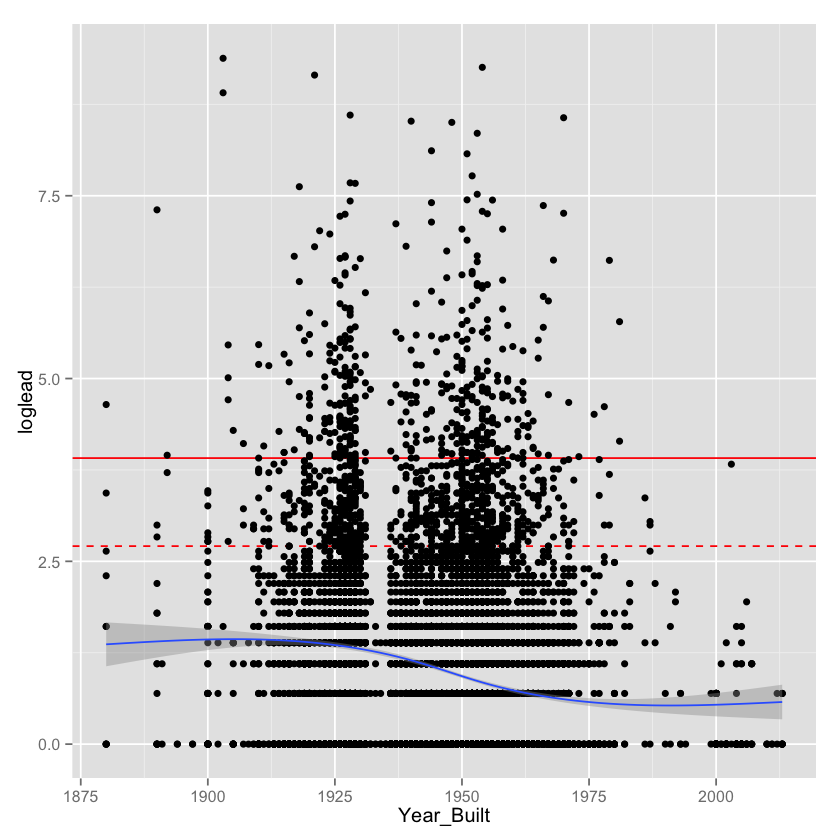

In [12]:
lead_yrbuilt +
geom_point() +  
stat_smooth(method = "lm", formula = y ~ ns(x,3)) 


In [ ]:
ggplot( data=subset(df,Year_Built>1875), aes(y=loglead,x=Year_Built) ) +
geom_hline(yintercept = log(15),colour="red",lty=2, size=1.5) +
geom_hline(yintercept = log(150),colour="red", size=1.5) +
geom_point(alpha=.1) +  
stat_smooth(method = "lm", formula = y ~ ns(x,3) , size=2 ) +
scale_y_continuous("Lead (parts per billion)",
    breaks=c(0,log(10),log(15),log(50),log(100),log(150),log(500),log(10000)),
    labels=c("0","10","15","50","100","150","500","1000"),
    limit=c(0,log(500))  ## For visual leave off points > 500 ppb (less than 0.5% of data)
) +
scale_x_continuous("Year of property construction")+
theme_bw() 


In [14]:
pdf(file="lead_by_yearbuilt_residential_tests_short.pdf") # saves to pdf, but it doesn't display in Jupyter

ggplot( data=subset(df,Year_Built>1875), aes(y=loglead,x=Year_Built) ) +
geom_hline(yintercept = log(15),colour="red",lty=2, size=1.5) +
geom_hline(yintercept = log(150),colour="red", size=1.5) +
geom_point(alpha=.1) +  
stat_smooth(method = "lm", formula = y ~ ns(x,3) , size=2 ) +
scale_y_continuous("Lead (parts per billion)",
    breaks=c(0,log(10),log(15),log(50),log(100),log(150),log(500),log(10000)),
    labels=c("0","10","15","50","100","150","500","1000"),
    limit=c(0,log(500))  ## For visual leave off points > 500 ppb (less than 0.5% of data)
) +
scale_x_continuous("Year of property construction")+
theme_bw() 

dev.off()

Warning message:
: Removed 63 rows containing missing values (stat_smooth).Warning message:
: Removed 63 rows containing missing values (geom_point).

pdf 
  2